In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torch
plt.rcParams['figure.figsize'] = 15, 10

In [ ]:
# Initializing the transform for the dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5), (0.5))
])

In [ ]:
# Downloading the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root="./MNIST/train", train=True,transform=torchvision.transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root="./MNIST/test", train=False,transform=torchvision.transforms.ToTensor(),download=True)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256)
# Printing 25 random images from the training dataset
random_samples = np.random.randint(1, len(train_dataset), (25))

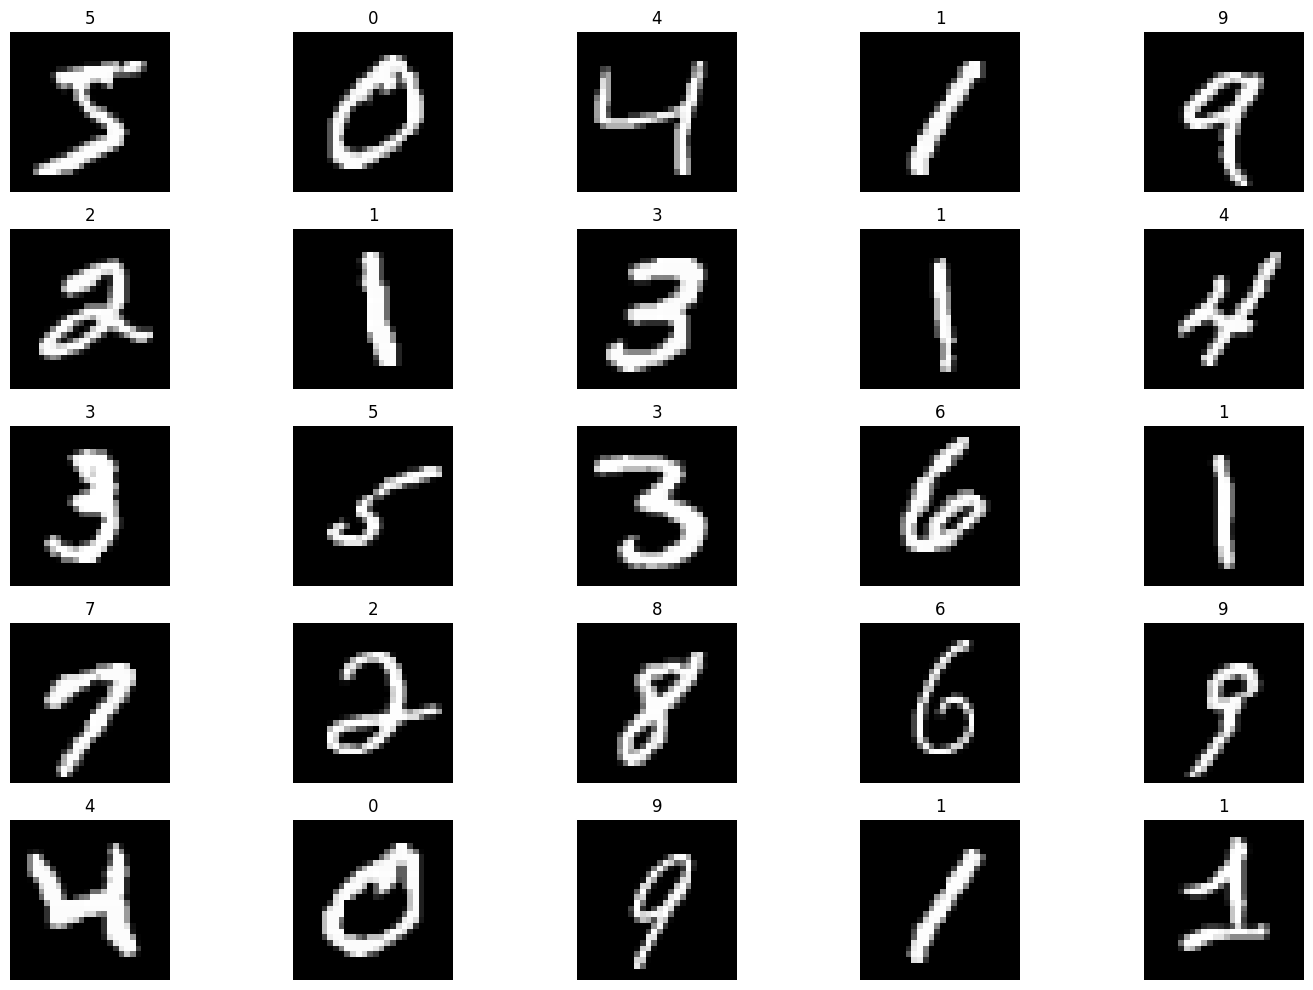

In [ ]:
for idx in range(random_samples.shape[0]):
  plt.subplot(5, 5, idx + 1)
  plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
  plt.title(train_dataset[idx][1])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
class DeepAutoencoder(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.encoder = torch.nn.Sequential(
        torch.nn.Linear(28 * 28, 256),
        torch.nn.ReLU(),
        torch.nn.Linear(256, 128),
        torch.nn.ReLU(),
        torch.nn.Linear(128, 64),
        torch.nn.ReLU(),
        torch.nn.Linear(64, 10)
    )

    self.decoder = torch.nn.Sequential(
        torch.nn.Linear(10, 64),
        torch.nn.ReLU(),
        torch.nn.Linear(64, 128),
        torch.nn.ReLU(),
        torch.nn.Linear(128, 256),
        torch.nn.ReLU(),
        torch.nn.Linear(256, 28 * 28),
        torch.nn.Sigmoid()
    )
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
model = DeepAutoencoder()
criterion = torch.nn.MSELoss()
num_epochs = 100
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

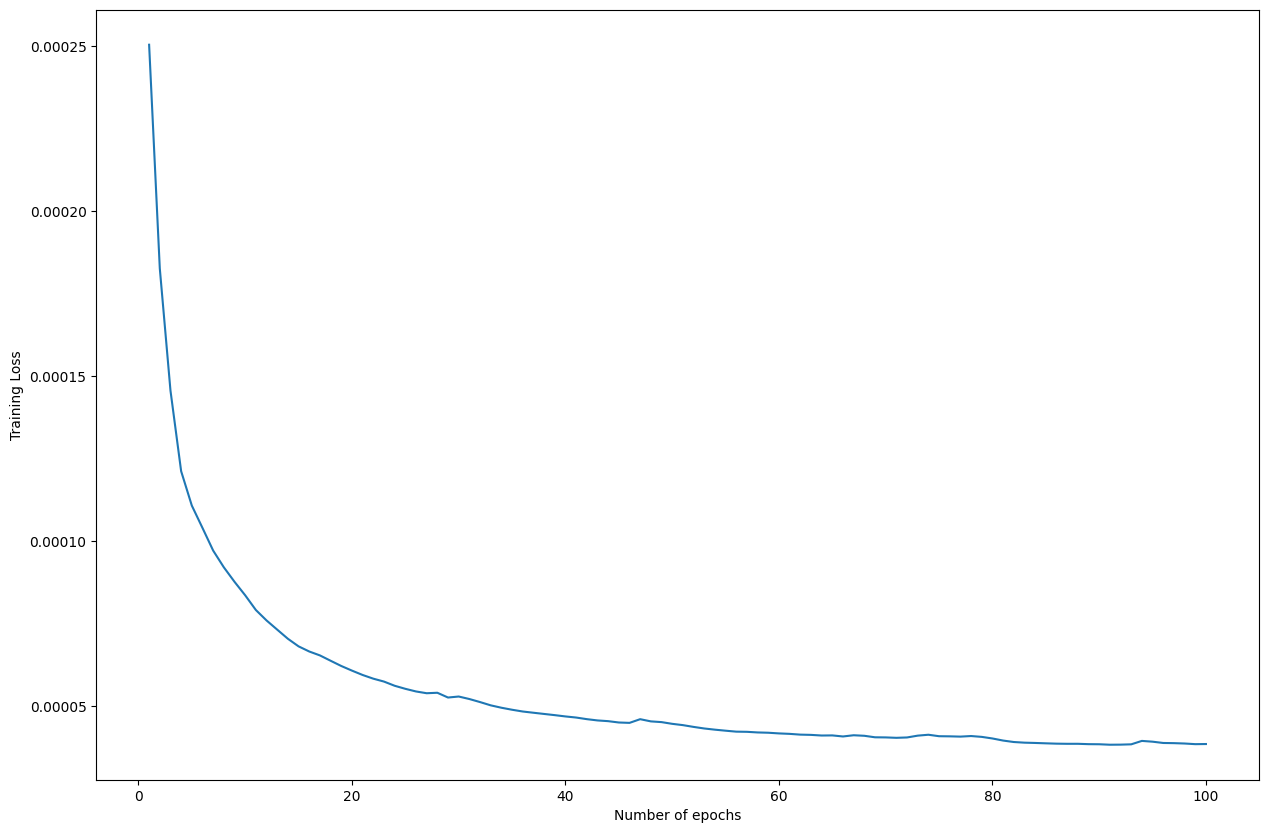

In [ ]:
train_loss = []
outputs = {}
batch_size = len(train_loader)
for epoch in range(num_epochs):
  running_loss = 0
  for batch in train_loader:
    img, _ = batch
    img = img.reshape(-1, 28*28)
    out = model(img)
    loss = criterion(out, img)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    running_loss /= batch_size
  train_loss.append(running_loss)
  outputs[epoch+1] = {'img': img, 'out': out}
plt.plot(range(1,num_epochs+1),train_loss)
plt.xlabel("Number of epochs")
plt.ylabel("Training Loss")
plt.show()

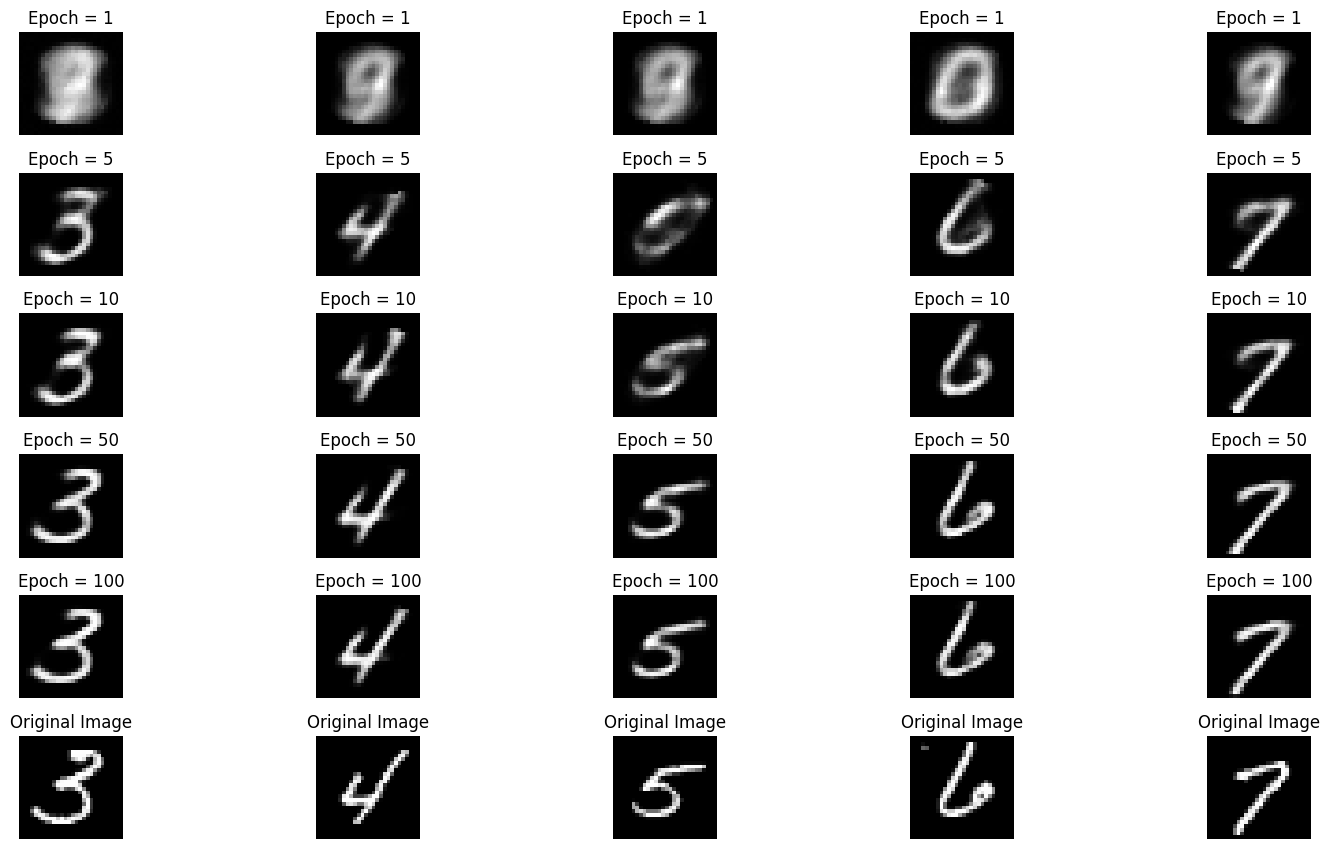

In [ ]:
counter = 1
epochs_list = [1, 5, 10, 50, 100]
for val in epochs_list:
  temp = outputs[val]['out'].detach().numpy()
  title_text = f"Epoch = {val}"
  for idx in range(5):
    plt.subplot(7, 5, counter)
    plt.title(title_text)
    plt.imshow(temp[idx].reshape(28,28), cmap= 'gray')
    plt.axis('off')
    counter+=1
for idx in range(5):
  val = outputs[10]['img']
  plt.subplot(7,5,counter)
  plt.imshow(val[idx].reshape(28, 28), cmap = 'gray')
  plt.title("Original Image")
  plt.axis('off')
  counter+=1
plt.tight_layout()
plt.show()


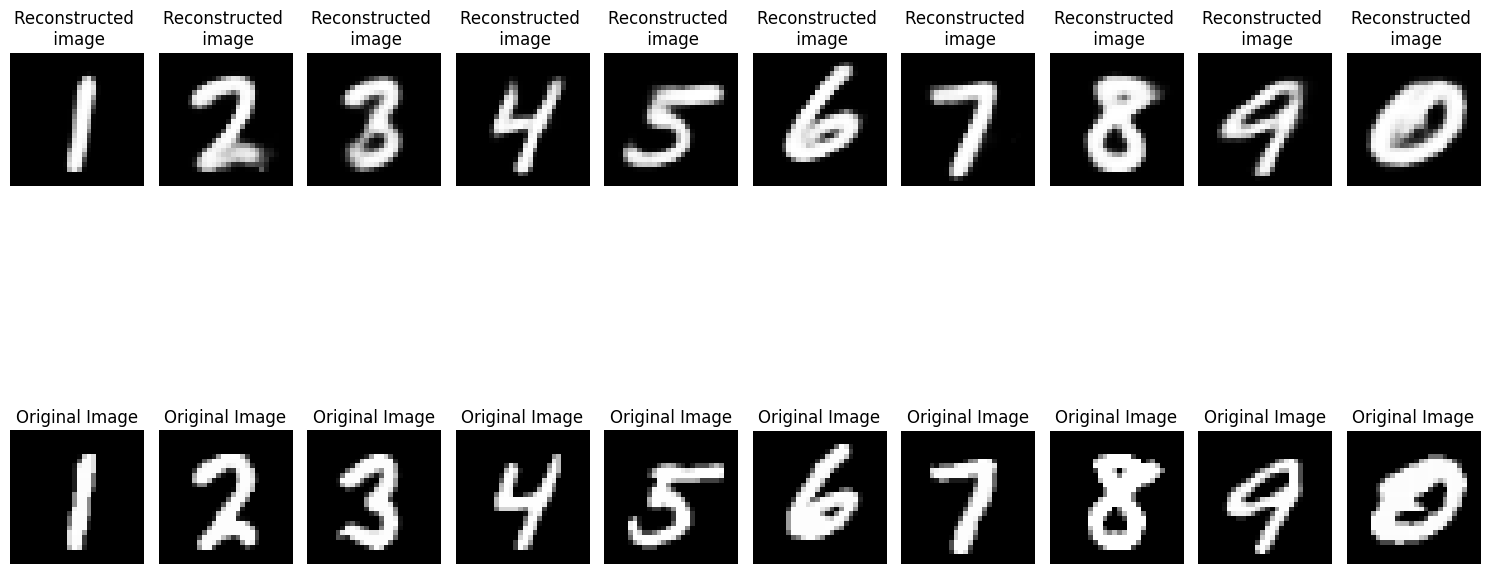

In [ ]:
outputs = {}
img, _ = list(test_loader)[-1]
img = img.reshape(-1, 28 * 28)
out = model(img)
outputs['img'] = img
outputs['out'] = out
counter = 1
val = outputs['out'].detach().numpy()
for idx in range(10):
  plt.subplot(2, 10, counter)
  plt.title("Reconstructed \n image")
  plt.imshow(val[idx].reshape(28, 28), cmap='gray')
  plt.axis('off')
  counter += 1
for idx in range(10):
  val = outputs['img']
  plt.subplot(2, 10, counter)
  plt.imshow(val[idx].reshape(28, 28), cmap='gray')
  plt.title("Original Image")
  plt.axis('off')
  counter += 1
plt.tight_layout()
plt.show()